In [1]:
# import os
# os.environ['DATA_READER_VENDOR'] = 'tiingo'
%pylab inline
from app.analysis import Quote
quote = Quote(Quote.screen_securities(min_assets=12, min_ratio=10, max_ratio=40), 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
from 2019-03-05 to 2019-08-30 - 363


In [2]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > .2) & (stats['len'] == stats['len'].max())]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

109


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
BX,122,0.344856,0.833253,0.406723,51.516332,9.602111
TSN,122,0.304562,0.619278,0.482190,46.769331,7.669581
HSY,122,0.300030,0.425377,0.691335,43.297612,3.101510
TGT,122,0.292332,1.170083,0.244752,43.202587,14.223338
TSS,122,0.290720,0.841247,0.338506,43.574012,10.094203
TWTR,122,0.268017,0.877650,0.298598,37.447633,15.612743
SBUX,122,0.265668,0.466844,0.556322,36.037492,5.458582
LDOS,122,0.265222,0.526667,0.492285,38.659162,6.399614
KMX,122,0.254371,0.719000,0.345506,37.086418,12.929711


In [3]:
ratios = []
for _ in range(6):
    quote.setup_mask(set(stats.index) - {s for r in ratios for s in r})
    _, rt = quote.optimize_portfolio(max_count=3).peekitem()
    ratios.append(rt)
ratios

evicted AJG 0.721 -0.017
evicted NDAQ 0.777 0.012
evicted ALL 0.655 0.048
evicted TRV 0.734 -0.055
evicted ICE 0.613 -0.198
evicted WM 0.705 -0.124
evicted ES 0.879 -0.261
evicted VMC 0.727 -0.090
evicted AEP 0.834 -0.195
evicted SO 0.788 -0.236
evicted VRSN 0.814 -0.027
evicted MDLZ 0.714 0.008
evicted SYK 0.815 -0.243
evicted BF-B 0.618 -0.023
evicted PLD 0.651 -0.021
evicted WEC 0.833 -0.409
evicted CL 0.690 -0.023
evicted DEO 0.736 -0.260
evicted LMT 0.693 -0.027
evicted AON 0.774 0.015
evicted ATO 0.755 -0.066
evicted AWK 0.757 -0.301
evicted WPC 0.673 -0.121
evicted WLTW 0.666 -0.023
evicted KMB 0.695 -0.045
evicted HCP 0.706 -0.318
evicted RSG 0.658 -0.221
evicted GIS 0.559 -0.315
evicted MSFT 0.837 -0.082
evicted ADP 0.703 -0.026
evicted ROP 0.742 0.069
evicted CB 0.704 -0.138
evicted V 0.776 -0.008
evicted APO 0.833 -0.072
evicted MSCI 0.701 0.024
evicted RELX 0.548 -0.114
evicted PEP 0.624 -0.039
evicted IEX 0.712 -0.247
evicted NEE 0.775 -0.311
evicted ACGL 0.716 -0.067
evic

[{'CBOE': 0.276, 'HSY': 0.397, 'SNN': 0.327},
 {'SPGI': 0.457, 'WEC': 0.543},
 {'ETR': 0.482, 'TSN': 0.283, 'TSS': 0.235},
 {'AWK': 0.368, 'ICE': 0.315, 'SBUX': 0.317},
 {'COST': 0.295, 'EXR': 0.431, 'MMP': 0.274},
 {'EVRG': 0.307, 'MCD': 0.693}]

In [ ]:
quote.setup_mask(['MCD', 'NEE', 'SBUX', 'COST'])
quote.find_optimal_ratio()[0]

{'CBOE': 0.09, 'HSY': 0.13, 'SNN': 0.11, 'SPGI': 0.15, 'WEC': 0.18, 'COST': 0.03, 'MCD': 0.14, 'NEE': 0.09, 'SBUX': 0.06}


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.208723,0.206333,-0.290021,0.071583,0.180699,0.330327,0.783282,0.982737,28.510097,1.970785
HSY,122.0,0.300030,0.425377,-0.545597,-0.003509,0.260069,0.532969,1.489761,0.691335,43.297612,3.101510
MCD,122.0,0.158893,0.255623,-0.425845,0.000829,0.150832,0.321784,0.798561,0.598304,21.536134,2.934656
SBUX,122.0,0.265668,0.466844,-0.899532,0.009580,0.252696,0.429502,1.944982,0.556322,36.037492,5.458582
SPGI,122.0,0.228691,0.401761,-1.015431,-0.016110,0.212012,0.466118,1.293448,0.554406,32.079008,5.069588
WEC,122.0,0.190598,0.338898,-0.544374,-0.059500,0.239479,0.442718,0.873395,0.544841,27.377683,4.518154
COST,122.0,0.231198,0.491939,-1.087295,-0.041865,0.202619,0.483037,1.522428,0.457872,34.751071,6.295289
NEE,122.0,0.143463,0.313961,-0.572229,-0.053471,0.151146,0.356380,0.880774,0.437987,17.726411,3.651282
SNN,122.0,0.181159,0.410953,-0.798525,-0.050514,0.121884,0.354535,1.646195,0.426341,23.857492,5.491569
CBOE,122.0,0.201553,0.477790,-0.817555,-0.116780,0.168725,0.503962,1.515390,0.409387,23.687000,6.899649


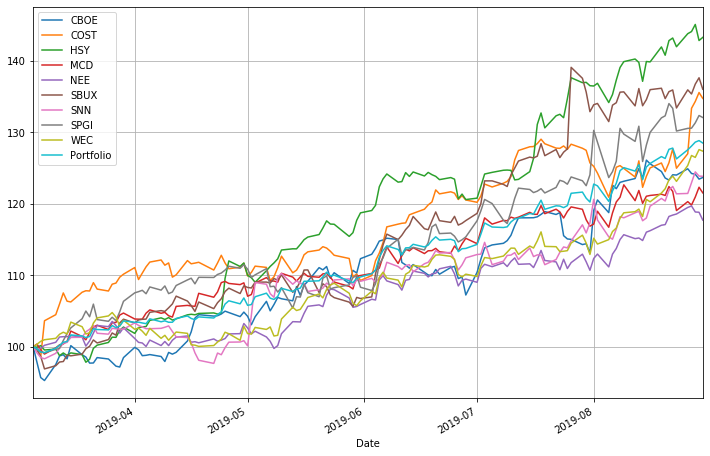

In [5]:
ratios = [
{'CBOE': 0.276, 'HSY': 0.397, 'SNN': 0.327},
{'SPGI': 0.457, 'WEC': 0.543},
{'COST': 0.1, 'MCD': 0.43, 'NEE': 0.281, 'SBUX': 0.189}
]
ratio = {}
for rt in ratios:
    for s in rt:
        ratio[s] = round(rt[s] / len(ratios), 2)
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)